# Hepatitis C Virus Classification

Dataset: https://archive.ics.uci.edu/dataset/571/hcv+data

## Libraries import

In [178]:
from utils import *
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.calibration import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import cross_val_predict
import seaborn as sn
from sklearn.metrics import roc_curve, auc

def myPlotROCcurve(target_test, prediction, text=""):
    fpr, tpr, _ = roc_curve(target_test, prediction)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) - ' + text)
    plt.legend(loc='lower right')
    plt.show()

def myPlotConfusionMatrix(target_test, prediction, text=""):
    conf_matrix = confusion_matrix(target_test, prediction)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.title(text)
    plt.show()


def myCrossValidation(classifier, cv_techique, features, target):
    accuracy = cross_val_score(
    classifier, # Classifier
    features, # Feature matrix
    target, # Target vector
    cv=cv_techique, # Cross-validation technique
    scoring="accuracy", # Loss function
    n_jobs=-1) # Use all CPU scores

    accuracy = np.mean(accuracy)

    precision = cross_val_score(
        classifier, # Classifier
        features, # Feature matrix
        target, # Target vector
        cv=cv_techique, # Cross-validation technique
        scoring="precision", # Loss function
        n_jobs=-1) # Use all CPU scores

    precision = np.mean(precision)

    recall = cross_val_score(
        classifier, # Classifier
        features, # Feature matrix
        target, # Target vector
        cv=cv_techique, # Cross-validation technique
        scoring="recall", # Loss function
        n_jobs=-1) # Use all CPU scores

    recall = np.mean(recall)

    f1 = cross_val_score(
        classifier, # Classifier
        features, # Feature matrix
        target, # Target vector
        cv=cv_techique, # Cross-validation technique
        scoring="f1", # Loss function
        n_jobs=-1) # Use all CPU scores

    f1 = np.mean(f1)

    predictions = cross_val_predict(
        classifier, 
        features, 
        target, 
        cv=cv_techique, 
        method='predict_proba')[:, 1]
    
    threshold = 0.5
    predictions = pred_binary = (predictions > threshold).astype(int)

    return pd.DataFrame({"Accuracy": accuracy,
                         "Precision": precision,
                         "Recall": recall,
                         "F1": f1},
                         index=[0]), predictions

## Data import and manipulation

In [179]:
dataframe = pd.read_csv('hcvdat0.csv')

dataframe.drop("Unnamed: 0", axis=1, inplace=True)

dataframe.dropna(inplace=True)


scale_mapper = {
    "0=Blood Donor": 0,
    "0s=suspect Blood Donor": 2,
    "1=Hepatitis": 1,
    "2=Fibrosis": 1,
    "3=Cirrhosis": 1}

# Deviding blood types in two types
dataframe['Category'] = dataframe['Category'].replace(scale_mapper)
dataframe['Sex'] = dataframe['Sex'].replace({"m":0, "f":1})

# Removal of suspect blood donor becaouse they are not useful for model
dataframe = dataframe[dataframe['Category'] != 2]

# Define the age ranges and labels for each category
age_bins = [0, 18, 30, 40, 50, 60, 70, 120]  # Define the age bins
age_labels = ['0', '1', '2', '3', '4', '5', '6']  # Define the labels for each age group

# Categorize ages into age groups
dataframe['Age'] = pd.cut(dataframe['Age'], bins=age_bins, labels=age_labels)

dataframe.head(20)

dataframe.to_csv("wrangled_data.csv")


### Outlier detection

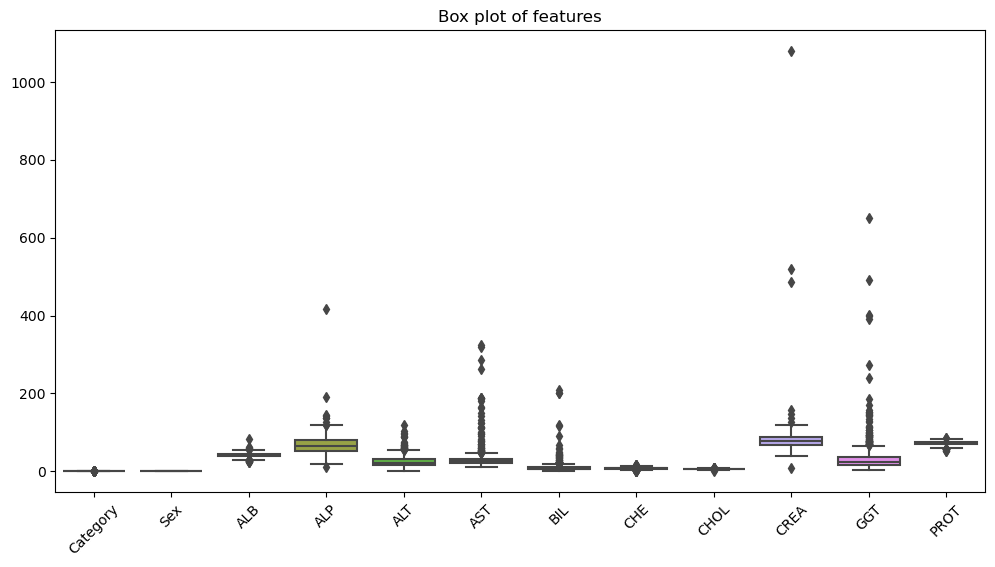

c:\Users\Nemanja\.conda\envs\mlenv\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\Nemanja\.conda\envs\mlenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Nemanja\.conda\envs\mlenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Nemanja\.conda\envs\mlenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

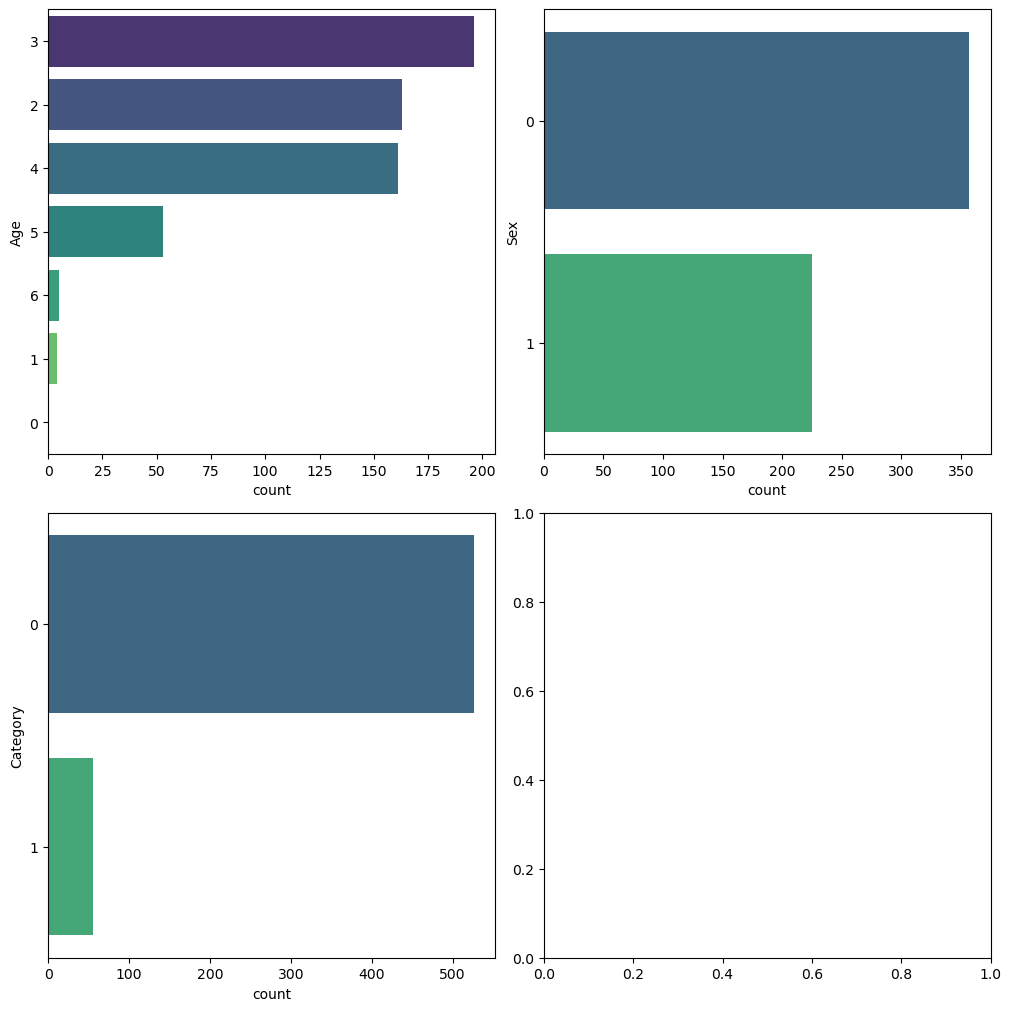

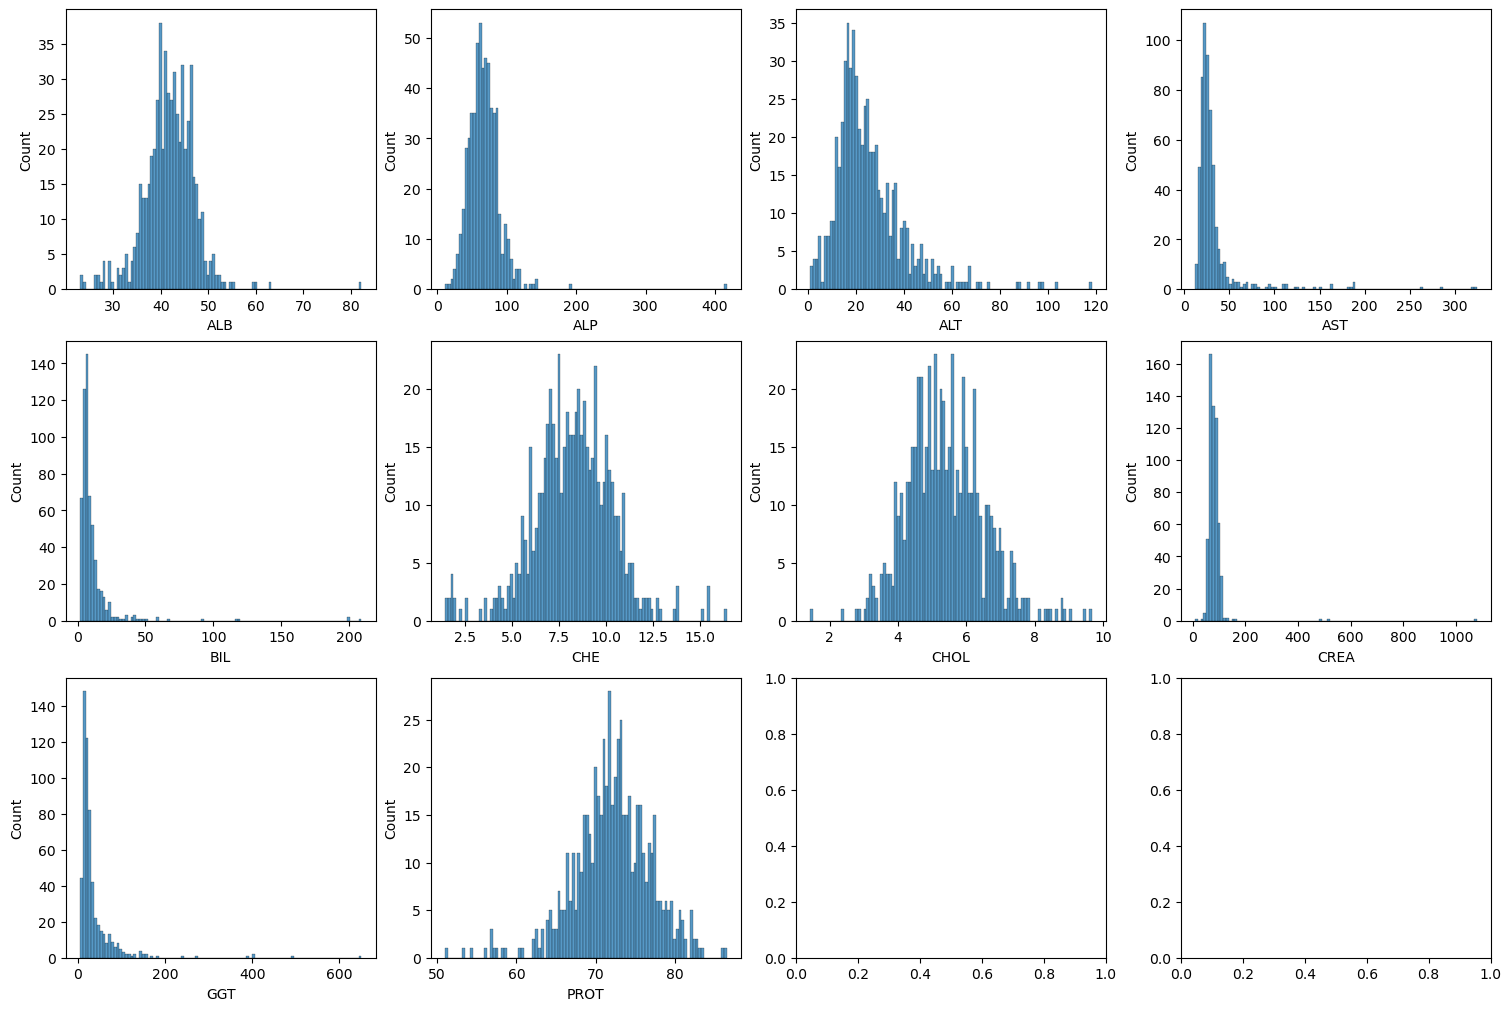

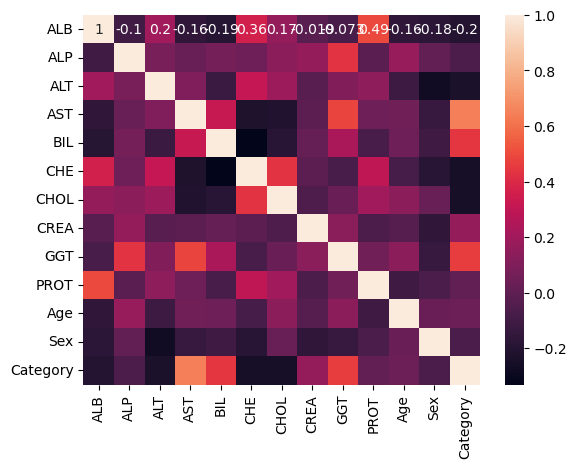

               ALB       ALP       ALT       AST       BIL       CHE  \
ALB       1.000000 -0.103431  0.200235 -0.161389 -0.194822  0.364617   
ALP      -0.103431  1.000000  0.078155  0.027222  0.066974  0.043800   
ALT       0.200235  0.078155  1.000000  0.100191 -0.126918  0.311920   
AST      -0.161389  0.027222  0.100191  1.000000  0.321066 -0.224441   
BIL      -0.194822  0.066974 -0.126918  0.321066  1.000000 -0.330494   
CHE       0.364617  0.043800  0.311920 -0.224441 -0.330494  1.000000   
CHOL      0.167053  0.135502  0.184870 -0.211018 -0.187060  0.428312   
CREA     -0.018850  0.167393 -0.024710 -0.009114  0.019625 -0.013163   
GGT      -0.073379  0.428599  0.102898  0.481591  0.234191 -0.074410   
PROT      0.493732 -0.014861  0.146857  0.048419 -0.071996  0.297580   
Age      -0.159642  0.173311 -0.114250  0.057835  0.048684 -0.085646   
Sex      -0.178748  0.003135 -0.272588 -0.134649 -0.111291 -0.185438   
Category -0.203710 -0.062378 -0.233696  0.645313  0.442584 -0.24

In [180]:
# Create a box plot for each feature
plt.figure(figsize=(12, 6))
sns.boxplot(data=dataframe)
plt.title('Box plot of features')
plt.xticks(rotation=45)
plt.show()

fig, axs = plt.subplots(2, 2, figsize=(10,10), constrained_layout=True)
categorical = ['Age', 'Sex', 'Category']
for i, f in enumerate(categorical):
    sns.countplot(y=f, data=dataframe, ax=axs[i//2][i%2], order=dataframe[f].value_counts().index, palette='viridis')

fig, axs = plt.subplots(3, 4, figsize=(15, 10), constrained_layout=True)
numerical = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']
for i, f in enumerate(numerical):
    sns.histplot(x=f, data=dataframe, ax=axs[i//4][i%4], bins=100)  # Adjusted indexing here
plt.show()

corr_matrix = dataframe[[*numerical, *categorical]].corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()
print(corr_matrix)

c:\Users\Nemanja\.conda\envs\mlenv\Lib\site-packages\sklearn\covariance\_robust_covariance.py:745: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(
c:\Users\Nemanja\.conda\envs\mlenv\Lib\site-packages\sklearn\covariance\_robust_covariance.py:184: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-92.965522712598883 > -93.053770365102352). You may want to try with a higher value of support_fraction (current value: 0.510).
  warnings.warn(


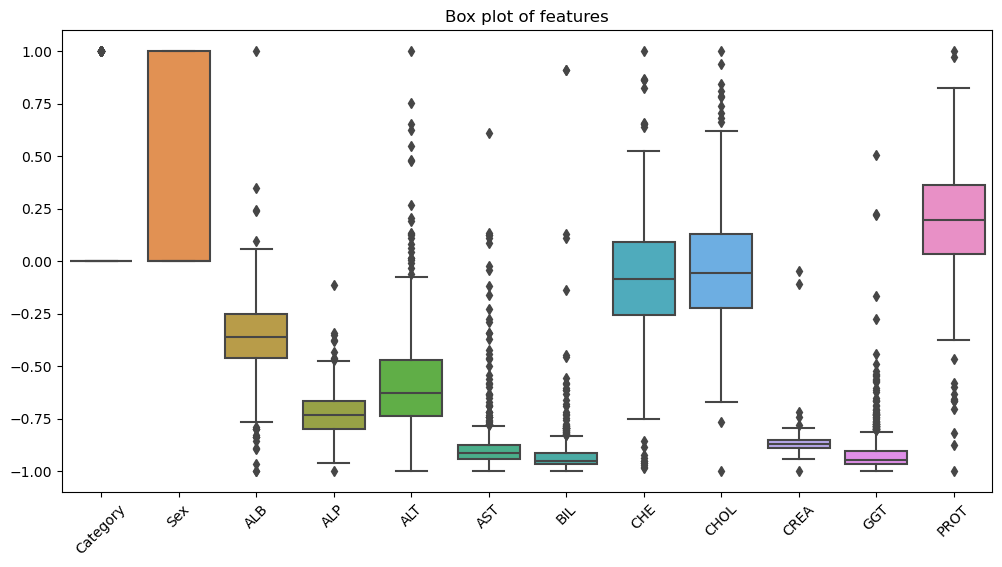

c:\Users\Nemanja\.conda\envs\mlenv\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\Nemanja\.conda\envs\mlenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Nemanja\.conda\envs\mlenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Nemanja\.conda\envs\mlenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

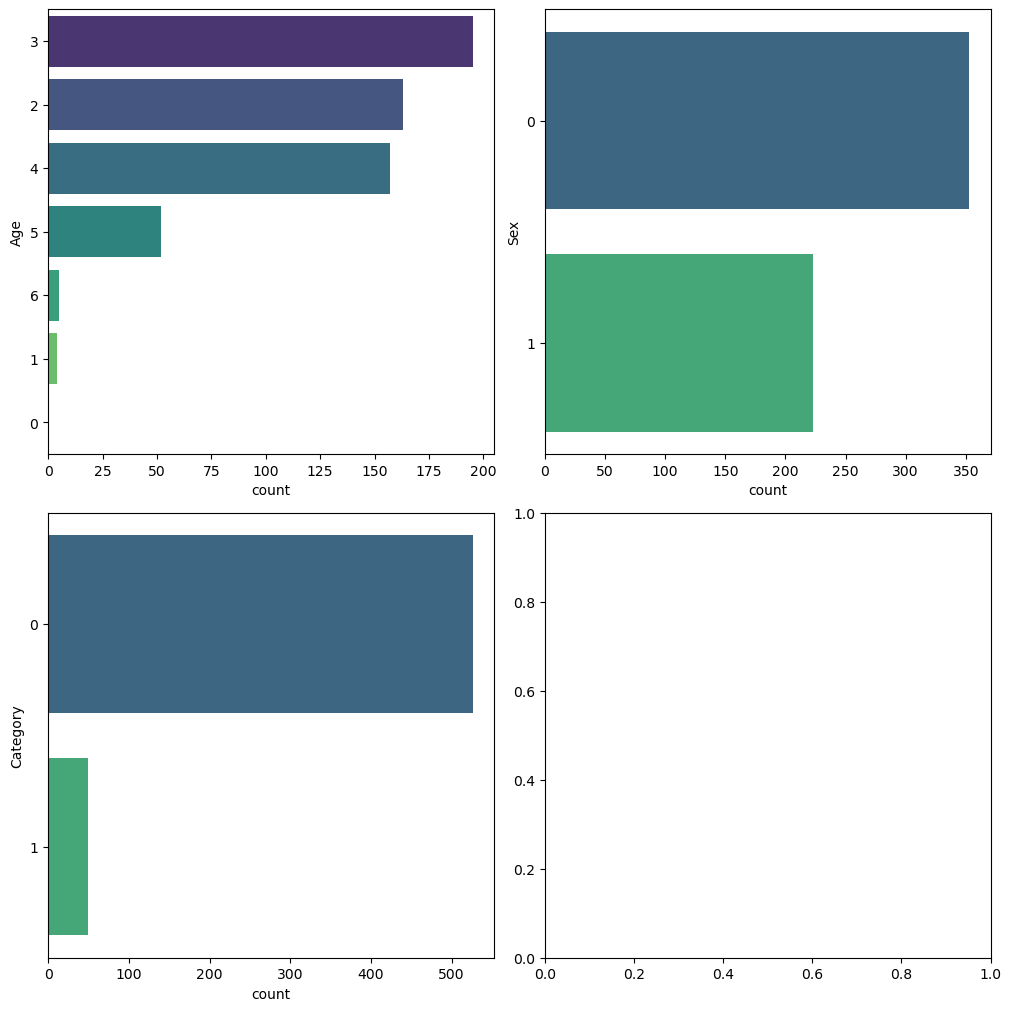

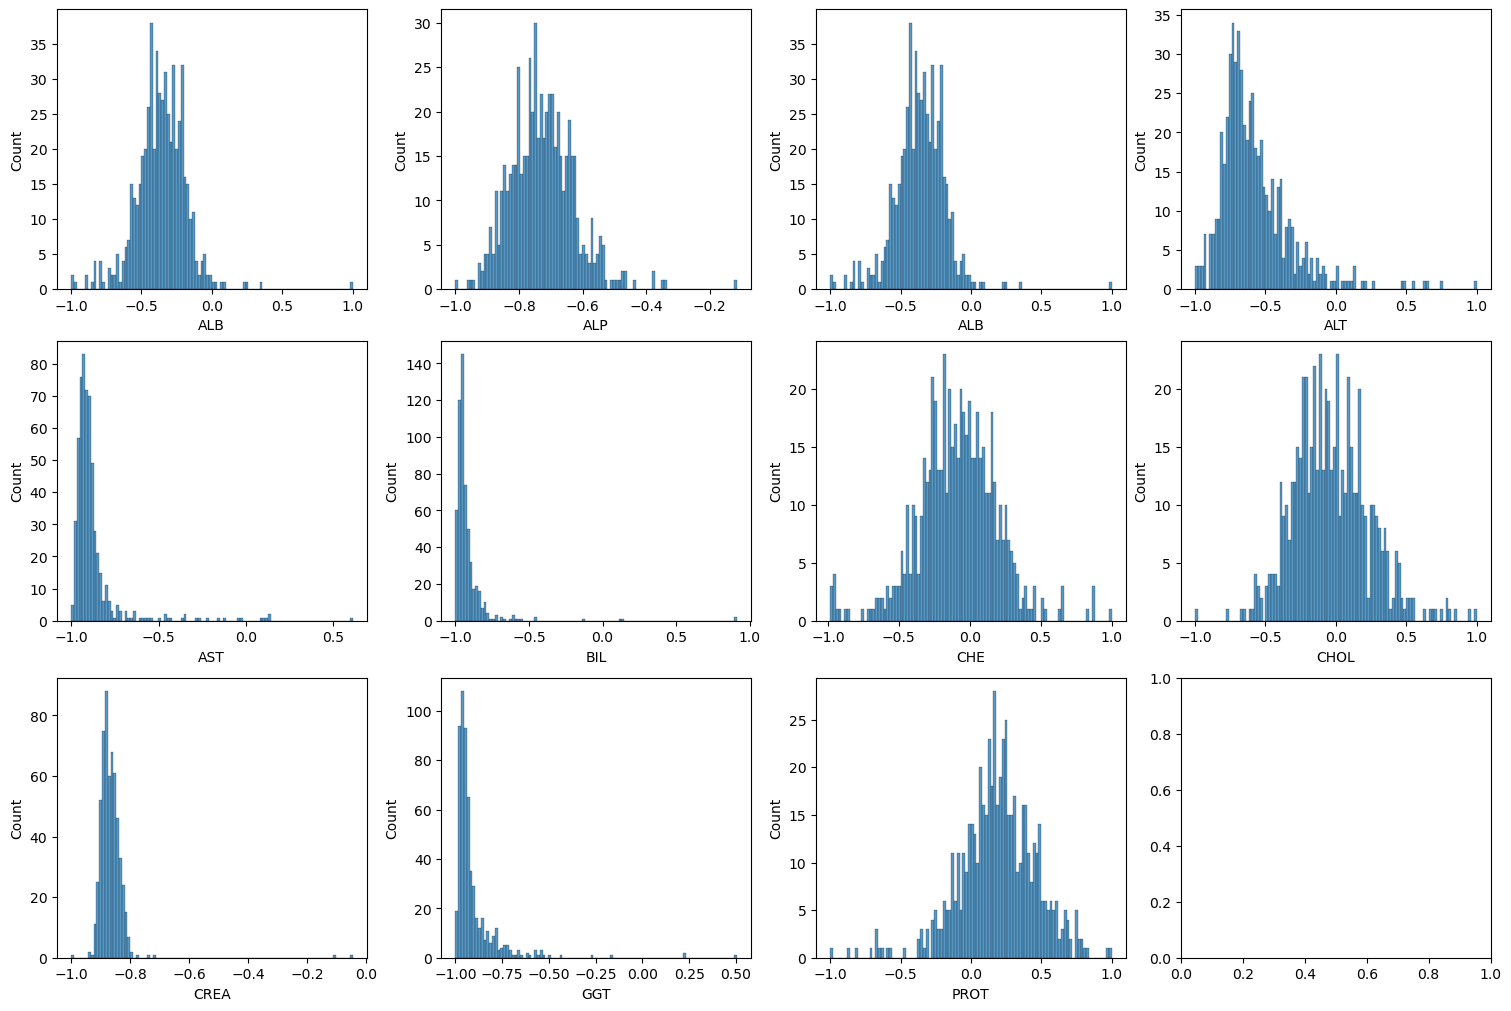

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,2,0,-0.476351,-0.796694,-0.883959,-0.935256,-0.944981,-0.264843,-0.563107,-0.817011,-0.976485,0.014085
1,0,2,0,-0.476351,-0.708858,-0.708191,-0.918590,-0.979730,0.300867,-0.182039,-0.876762,-0.965656,0.436620
2,0,2,0,-0.192568,-0.687145,-0.397611,-0.739744,-0.958494,-0.010007,-0.084951,-0.854355,-0.911200,0.594366
3,0,2,0,-0.317568,-0.799161,-0.493174,-0.932051,-0.834942,-0.211474,-0.196602,-0.865559,-0.909344,0.391549
4,0,2,0,-0.452703,-0.690106,-0.459044,-0.917949,-0.924710,0.031354,-0.298544,-0.873028,-0.921411,-0.002817
5,0,2,0,-0.371622,-0.842092,-0.699659,-0.950641,-0.898649,0.134089,0.121359,-0.807674,-0.732364,0.295775
6,0,2,0,-0.212838,-0.851962,-0.716724,-0.962821,-0.935328,-0.254169,-0.184466,-0.884231,-0.961634,0.323944
7,0,2,0,-0.351351,-0.849001,-0.404437,-0.877564,-0.861969,-0.412942,-0.230583,-0.811409,-0.947401,-0.092958
8,0,2,0,-0.057432,-0.732544,-0.619454,-0.941026,-0.950772,-0.030020,-0.351942,-0.859957,-0.971535,0.143662
9,0,2,0,-0.344595,-0.629904,-0.668942,-0.948718,-0.677606,-0.460974,-0.266990,-0.863692,-0.964728,0.064789


In [181]:

columns_to_scale = ['ALB', 'ALP', 'ALB', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

scaler = MinMaxScaler(feature_range=(-1, 1))
dataframe[columns_to_scale] = scaler.fit_transform(dataframe[columns_to_scale])

outlier_detector = EllipticEnvelope(contamination=.009)

# Fit detector
outlier_detector.fit(dataframe[columns_to_scale])

# Predict outliers
outliers = outlier_detector.predict(dataframe[columns_to_scale])
outliers_indices = outliers == -1
dataframe = dataframe[~outliers_indices]

# Create a box plot for each feature
plt.figure(figsize=(12, 6))
sns.boxplot(data=dataframe)
plt.title('Box plot of features')
plt.xticks(rotation=45)
plt.show()

fig, axs = plt.subplots(2, 2, figsize=(10,10), constrained_layout=True)
categorical = ['Age', 'Sex', 'Category']
for i, f in enumerate(categorical):
    sns.countplot(y=f, data=dataframe, ax=axs[i//2][i%2], order=dataframe[f].value_counts().index, palette='viridis')

fig, axs = plt.subplots(3, 4, figsize=(15, 10), constrained_layout=True)
numerical = ['ALB', 'ALP', 'ALB', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']
for i, f in enumerate(numerical):
    sns.histplot(x=f, data=dataframe, ax=axs[i//4][i%4], bins=100)  # Adjusted indexing here
plt.show()

dataframe.head(15)

## Train-Test splitting

In [193]:
dataframe_shuffled = dataframe.sample(frac=1) 

features, target = dataframe_shuffled.drop('Category', axis=1), dataframe_shuffled['Category']

# Split into training and test set
features_train, features_test, target_train, target_test = train_test_split(
features, target, random_state=0)

features_train2 = pd.DataFrame(features_train)

## Model testing 

### Dummy classifier

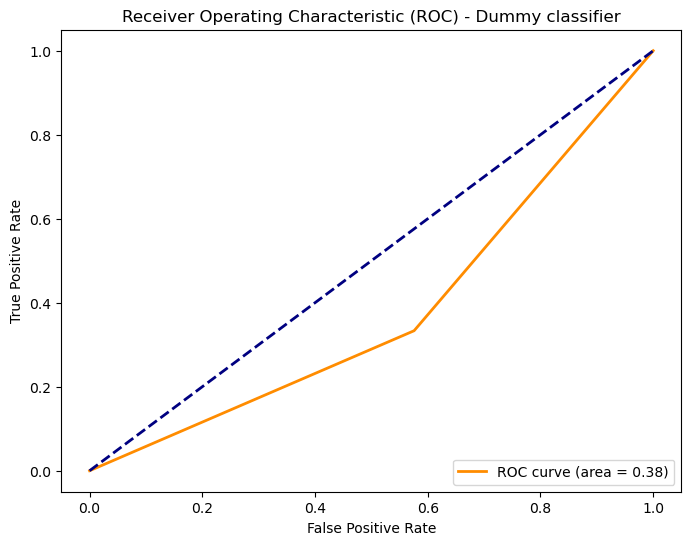

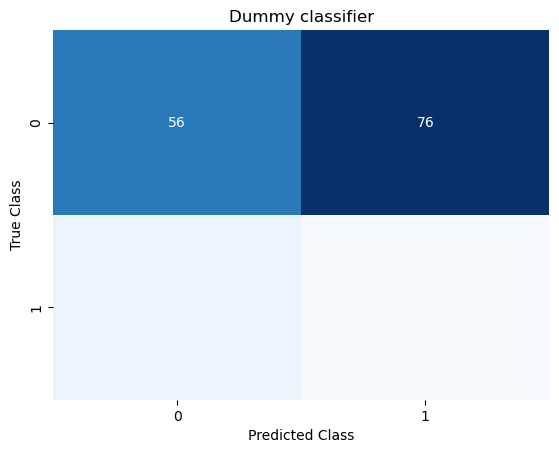

              precision    recall  f1-score   support

           0       0.88      0.42      0.57       132
           1       0.05      0.33      0.09        12

    accuracy                           0.42       144
   macro avg       0.46      0.38      0.33       144
weighted avg       0.81      0.42      0.53       144



In [183]:
# Create dummy classifier
dummy = DummyClassifier(strategy='uniform', random_state=1)

# "Train" model
dummy.fit(features_train, target_train)

# Predict on test features
dummy_prediction = dummy.predict(features_test)

# Visualize the ROC curve
myPlotROCcurve(target_test, dummy_prediction, "Dummy classifier")

# Visualize the confusion matrix
myPlotConfusionMatrix(target_test, dummy_prediction, "Dummy classifier")

dummy_report = classification_report(target_test, dummy_prediction)
print(dummy_report)

### RandomForestClassifier, Basic split

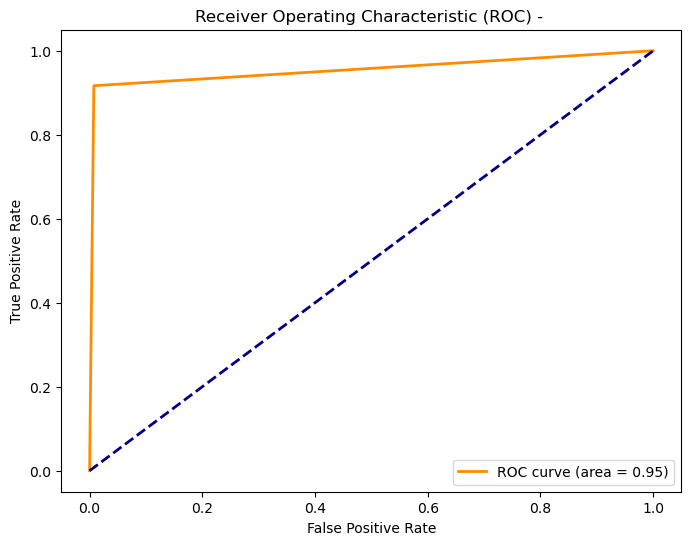

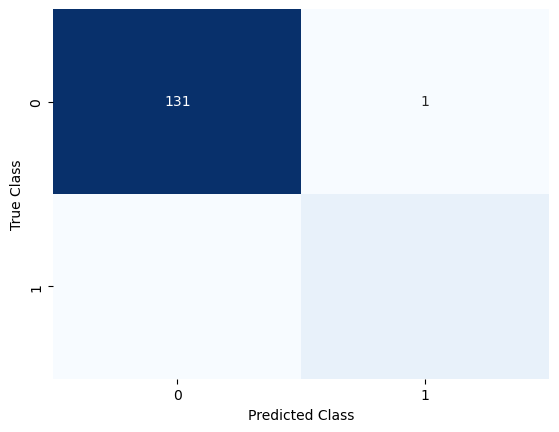


Basic split Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       132
           1       0.92      0.92      0.92        12

    accuracy                           0.99       144
   macro avg       0.95      0.95      0.95       144
weighted avg       0.99      0.99      0.99       144



In [184]:
# Create classifier
rf_classifier = RandomForestClassifier()

# Train model
rf_classifier.fit(features_train, target_train)

# Predict on test features
rfc_prediction = rf_classifier.predict(features_test)

# Visualize the ROC curve
myPlotROCcurve(target_test, rfc_prediction)

# Visualize the confusion matrix
myPlotConfusionMatrix(target_test, rfc_prediction)

# Print classification report
print("\nBasic split Random Forest Classifier Classification Report:")
rfc_report = classification_report(target_test, rfc_prediction)
print(rfc_report)

### RandomForestClassifier, Cross-Validation

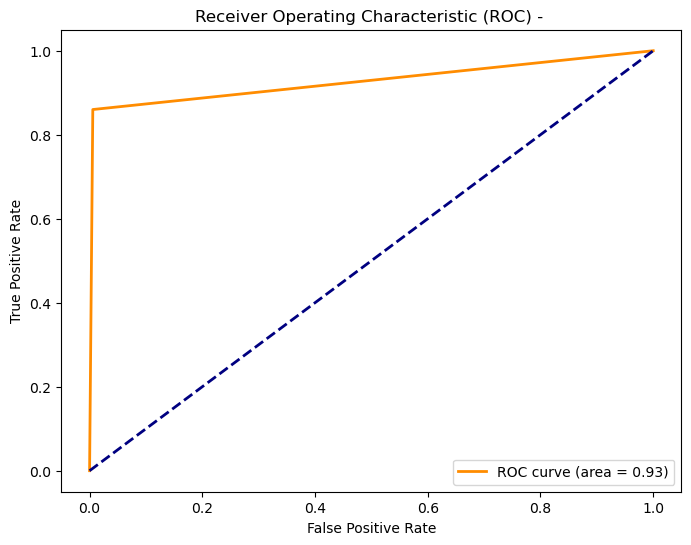

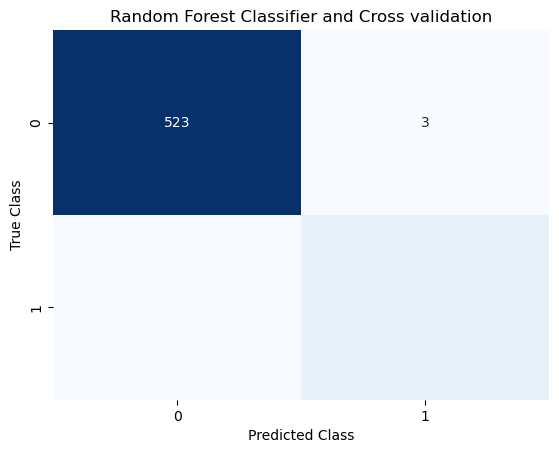

,Accuracy,Precision,Recall,F1
0,0.986086,0.971429,0.84,0.87381


In [185]:
# Create Random Forest Classifier object
rf_classifier = RandomForestClassifier()

# Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

rf_cv_results, predictions = myCrossValidation(rf_classifier, skf, features, target)

myPlotROCcurve(target, predictions)

myPlotConfusionMatrix(target, predictions, "Random Forest Classifier and Cross validation")

rf_cv_results.head()


### Naive Bayes, Basic split

In [194]:
nb_classifier = GaussianNB()


features_train.to_csv("blabla.csv")

print(features_train2.compare(features_train))

# Train model
nb_classifier.fit(features_train, target_train)

# Predict on test features
nb_prediction = nb_classifier.predict(features_test)

# Visualize the ROC curve
myPlotROCcurve(target_test, nb_prediction, "Naive Bayes, Basic split")

# Visualize the confusion matrix
myPlotConfusionMatrix(target_test, nb_prediction, "Naive Bayes, Basic split")

# Print classification report
print("\nBasic split Naive Bayes Classifier Classification Report:")
rfc_report = classification_report(target_test, nb_prediction)
print(rfc_report)





# # Train model
# nb_classifier_basicSplit.fit(features_train, target_train)

# # Get accuracy score on the test set
# nb_accuracy = nb_classifier_basicSplit.score(features_test, target_test)
# print("Basic split Train Test Split Random Forest Classifier Accuracy:", rf_accuracy)

# # Calculate precision, recall, and F1-score
# np_prediction = nb_classifier_basicSplit.predict(features_test)
# nb_precision = precision_score(target_test, np_prediction, average='binary')
# nb_recall = recall_score(target_test, np_prediction, average='binary')
# nb_f1 = f1_score(target_test, np_prediction, average='binary')

# print("Basic split Naive Bayes Classifier Precision: {:.2f}".format(nb_precision))
# print("Basic split Naive Bayes Classifier Recall: {:.2f}".format(nb_recall))
# print("Basic split Naive Bayes Classifier F1-score: {:.2f}".format(nb_f1))

# # Print classification report
# print("\nBasic split Naive Bayes Classifier Classification Report:")
# print(classification_report(target_test, np_prediction))

# # Visualize the confusion matrix
# conf_matrix_nb_alt = confusion_matrix(target_test, np_prediction)
# sns.heatmap(conf_matrix_nb_alt, annot=True, fmt='d', cmap='Blues', cbar=False)
# plt.xlabel('Predicted Class')
# plt.ylabel('True Class')
# plt.title('Confusion Matrix - Basic split Naive Bayes Classifier')
# plt.show()

# # Visualize the ROC curve
# fpr_nb_alt, tpr_nb_alt, _ = roc_curve(target_test, nb_classifier_basicSplit.predict_proba(features_test)[:, 1])
# roc_auc_nb_alt = auc(fpr_nb_alt, tpr_nb_alt)

# plt.figure(figsize=(8, 6))
# plt.plot(fpr_nb_alt, tpr_nb_alt, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_nb_alt))
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) - Basic split Naive Bayes Classifier')
# plt.legend(loc='lower right')
# plt.show()

# nb_bs_score = nb_accuracy

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

### Naive Bayes, Cross-Validation

Naive Bayes Cross-Validation Accuracy: 0.8820024198427102
Naive Bayes Cross-Validation Precision: 0.15384615384615385
Naive Bayes Cross-Validation Recall: 0.08
Naive Bayes Cross-Validation F1-score: 0.10526315789473685
Classification Report - Naive Bayes Classifier:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       526
           1       0.15      0.08      0.11        50

    accuracy                           0.88       576
   macro avg       0.54      0.52      0.52       576
weighted avg       0.85      0.88      0.86       576



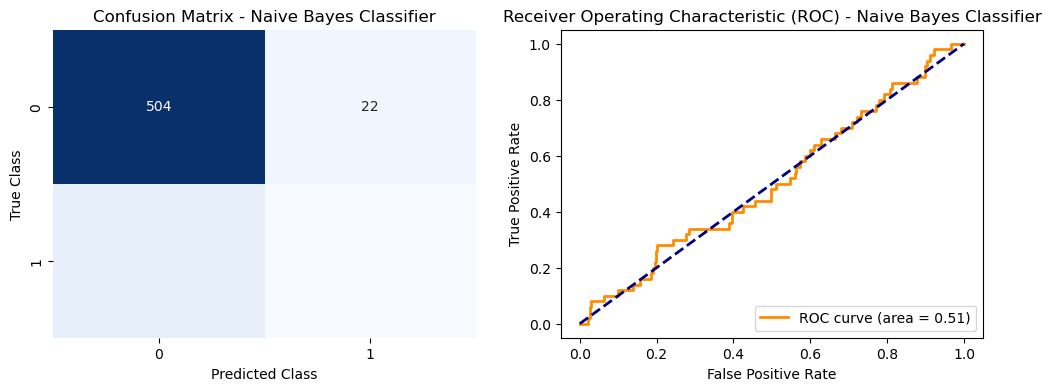

In [ ]:
# Create standardizer
standardizer_cv = StandardScaler()


# Create Random Forest Classifier object
nb_classifier_cv = GaussianNB()

# Create a pipeline that standardizes, then runs Random Forest Classifier
pipeline_nb_cv = make_pipeline(standardizer_cv, nb_classifier_cv)

# Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# Conduct k-fold cross-validation
skf_nbc_cv_results = cross_val_score(
    pipeline_nb_cv, # Pipeline
    features, # Feature matrix
    target, # Target vector
    cv=skf, # Cross-validation technique
    scoring="accuracy", # Loss function
    n_jobs=-1) # Use all CPU scores

# Calculate aggregated statistics directly from cross_val_score results
nb_cv_accuracy = np.mean(skf_nbc_cv_results)
nb_cv_precision = precision_score(target, cross_val_predict(pipeline_nb_cv, features, target, cv=skf), average='binary')
nb_cv_recall = recall_score(target, cross_val_predict(pipeline_nb_cv, features, target, cv=skf), average='binary')
nb_cv_f1 = f1_score(target, cross_val_predict(pipeline_nb_cv, features, target, cv=skf), average='binary')


# Confusion matrix and ROC based on cross_val_score results
cv_pred_direct = cross_val_predict(pipeline_nb_cv, features, target, cv=skf, method='predict_proba')[:, 1]

# Threshold for binary classification
threshold = 0.5
cv_pred_binary = (cv_pred_direct > threshold).astype(int)

# Confusion matrix
cv_conf_matrix_direct = confusion_matrix(target, cv_pred_binary)

# ROC curve
fpr_direct, tpr_direct, _ = roc_curve(target, cv_pred_direct)
roc_auc_direct = auc(fpr_direct, tpr_direct)

# Classification report
cv_classification_report = classification_report(target, cv_pred_binary)

# Print aggregated statistics
print("Naive Bayes Cross-Validation Accuracy:", nb_cv_accuracy)
print("Naive Bayes Cross-Validation Precision:", nb_cv_precision)
print("Naive Bayes Cross-Validation Recall:", nb_cv_recall)
print("Naive Bayes Cross-Validation F1-score:", nb_cv_f1)

# Print classification report
print("Classification Report - Naive Bayes Classifier:")
print(cv_classification_report)

# Visualize confusion matrix
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.heatmap(cv_conf_matrix_direct, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix - Naive Bayes Classifier')

# Visualize the ROC curve
plt.subplot(1, 2, 2)
plt.plot(fpr_direct, tpr_direct, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_direct))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Naive Bayes Classifier')
plt.legend(loc='lower right')

plt.show()

nb_cv_score = nb_cv_accuracy

### K-Nearest Neighbors, Basic split

Basic split Train Test Split k-Nearest Neighbors Classifier Accuracy: 0.9027777777777778
Basic split k-Nearest Neighbors Classifier Precision: 0.00
Basic split k-Nearest Neighbors Classifier Recall: 0.00
Basic split k-Nearest Neighbors Classifier F1-score: 0.00

Basic split k-Nearest Neighbors Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       130
           1       0.00      0.00      0.00        14

    accuracy                           0.90       144
   macro avg       0.45      0.50      0.47       144
weighted avg       0.82      0.90      0.86       144



c:\Users\Nemanja\.conda\envs\mlenv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nemanja\.conda\envs\mlenv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nemanja\.conda\envs\mlenv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nemanja\.conda\envs\mlenv\Lib\site-pa

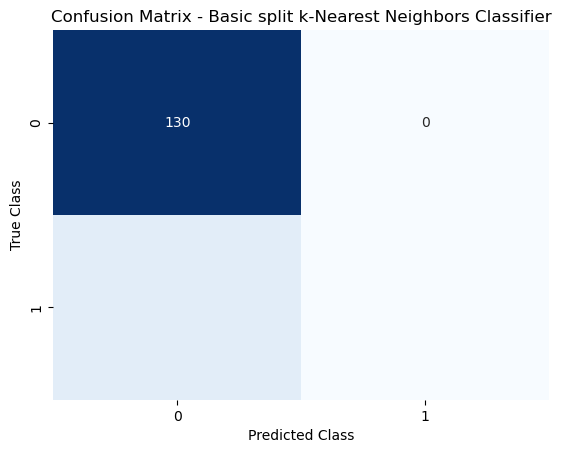

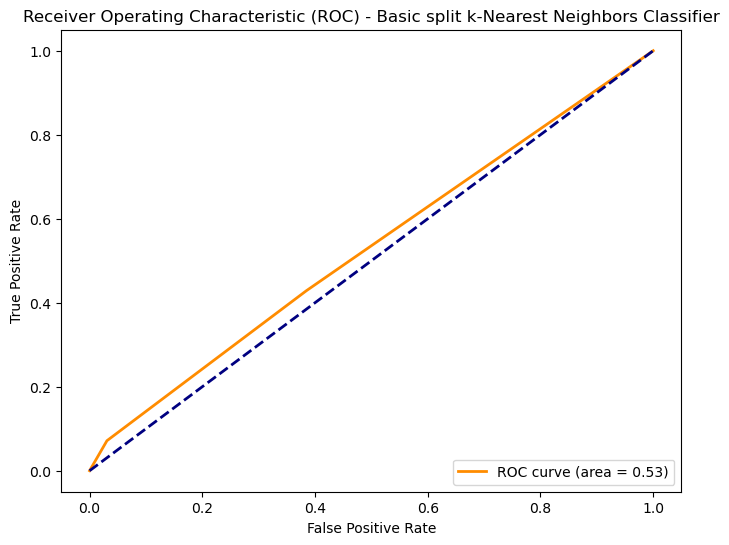

In [ ]:
# Create K-Nearest Neighbors classifier object
knn_classifier_basic_split = KNeighborsClassifier()

# Create a pipeline that standardizes, then runs KNN
pipeline_knn = make_pipeline(standardizer, knn_classifier_basic_split)

# Train model
pipeline_knn.fit(features_train, target_train)

# Get accuracy score on the test set
knn_accuracy = pipeline_knn.score(features_test, target_test)
print("Basic split Train Test Split k-Nearest Neighbors Classifier Accuracy:", knn_accuracy)

# Calculate precision, recall, and F1-score
knn_prediction = pipeline_knn.predict(features_test)
knn_precision = precision_score(target_test, knn_prediction, average='binary')
knn_recall = recall_score(target_test, knn_prediction, average='binary')
knn_f1 = f1_score(target_test, knn_prediction, average='binary')

print("Basic split k-Nearest Neighbors Classifier Precision: {:.2f}".format(knn_precision))
print("Basic split k-Nearest Neighbors Classifier Recall: {:.2f}".format(knn_recall))
print("Basic split k-Nearest Neighbors Classifier F1-score: {:.2f}".format(knn_f1))

# Print classification report
print("\nBasic split k-Nearest Neighbors Classifier Classification Report:")
print(classification_report(target_test, knn_prediction))

# Visualize the confusion matrix
conf_matrix_knn_alt = confusion_matrix(target_test, knn_prediction)
sns.heatmap(conf_matrix_knn_alt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix - Basic split k-Nearest Neighbors Classifier')
plt.show()

# Visualize the ROC curve
fpr_knn_alt, tpr_knn_alt, _ = roc_curve(target_test, pipeline_knn.predict_proba(features_test)[:, 1])
roc_auc_knn_alt = auc(fpr_knn_alt, tpr_knn_alt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn_alt, tpr_knn_alt, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_knn_alt))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Basic split k-Nearest Neighbors Classifier')
plt.legend(loc='lower right')
plt.show()

knn_bs_score = knn_accuracy

### K-Nearest Neighbors, Cross-Validation

k-Nearest Neighbors Cross-Validation Accuracy: 0.9097398669086509
k-Nearest Neighbors Cross-Validation Precision: 0.0
k-Nearest Neighbors Cross-Validation Recall: 0.0
k-Nearest Neighbors Cross-Validation F1-score: 0.0
Classification Report - k-Nearest Neighbors Classifier:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       526
           1       0.00      0.00      0.00        50

    accuracy                           0.91       576
   macro avg       0.46      0.50      0.48       576
weighted avg       0.83      0.91      0.87       576



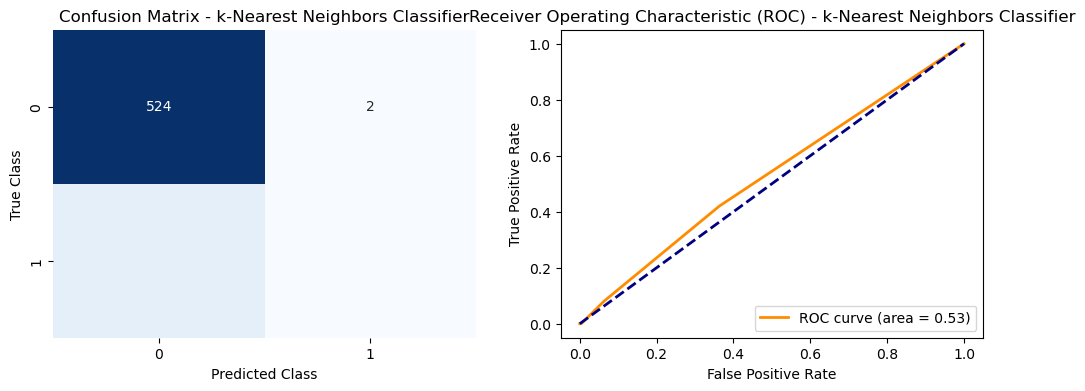

In [ ]:
# Create K-Nearest Neighbors classifier object
knn_classifier_cv = KNeighborsClassifier()

# Create a pipeline that standardizes, then runs KNN
pipeline_knn_cv = make_pipeline(standardizer_cv, knn_classifier_cv)

# Conduct k-fold cross-validation
skf_knn_cv_results = cross_val_score(
    pipeline_knn_cv,  # Pipeline
    features,          # Feature matrix
    target,            # Target vector
    cv=skf,            # Cross-validation technique
    scoring="accuracy",  # Loss function
    n_jobs=-1          # Use all CPU cores
)

# Calculate aggregated statistics directly from cross_val_score results
knn_cv_accuracy = np.mean(skf_knn_cv_results)
knn_cv_precision = precision_score(target, cross_val_predict(pipeline_knn_cv, features, target, cv=skf), average='binary')
knn_cv_recall = recall_score(target, cross_val_predict(pipeline_knn_cv, features, target, cv=skf), average='binary')
knn_cv_f1 = f1_score(target, cross_val_predict(pipeline_knn_cv, features, target, cv=skf), average='binary')

# Confusion matrix and ROC based on cross_val_score results
cv_pred_knn_direct = cross_val_predict(pipeline_knn_cv, features, target, cv=skf, method='predict_proba')[:, 1]

# Threshold for binary classification
threshold_knn = 0.5
cv_pred_binary_knn = (cv_pred_knn_direct > threshold_knn).astype(int)

# Confusion matrix
cv_conf_matrix_knn_direct = confusion_matrix(target, cv_pred_binary_knn)

# ROC curve
fpr_knn_direct, tpr_knn_direct, _ = roc_curve(target, cv_pred_knn_direct)
roc_auc_knn_direct = auc(fpr_knn_direct, tpr_knn_direct)

# Classification report
cv_classification_report_knn = classification_report(target, cv_pred_binary_knn)

# Print aggregated statistics
print("k-Nearest Neighbors Cross-Validation Accuracy:", knn_cv_accuracy)
print("k-Nearest Neighbors Cross-Validation Precision:", knn_cv_precision)
print("k-Nearest Neighbors Cross-Validation Recall:", knn_cv_recall)
print("k-Nearest Neighbors Cross-Validation F1-score:", knn_cv_f1)

# Print classification report
print("Classification Report - k-Nearest Neighbors Classifier:")
print(cv_classification_report_knn)

# Visualize confusion matrix
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.heatmap(cv_conf_matrix_knn_direct, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix - k-Nearest Neighbors Classifier')

# Visualize the ROC curve
plt.subplot(1, 2, 2)
plt.plot(fpr_knn_direct, tpr_knn_direct, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_knn_direct))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - k-Nearest Neighbors Classifier')
plt.legend(loc='lower right')

plt.show()

knn_cv_score = knn_cv_accuracy

### Gradient Boosting, Basic split

Basic split Train Test Split Gradient Boosting Classifier Accuracy: 0.8819444444444444
Basic split Gradient Boosting Classifier Precision: 0.00
Basic split Gradient Boosting Classifier Recall: 0.00
Basic split Gradient Boosting Classifier F1-score: 0.00

Basic split Gradient Boosting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       130
           1       0.00      0.00      0.00        14

    accuracy                           0.88       144
   macro avg       0.45      0.49      0.47       144
weighted avg       0.81      0.88      0.85       144



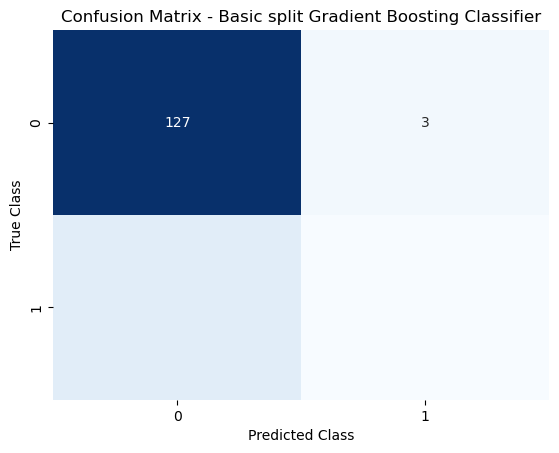

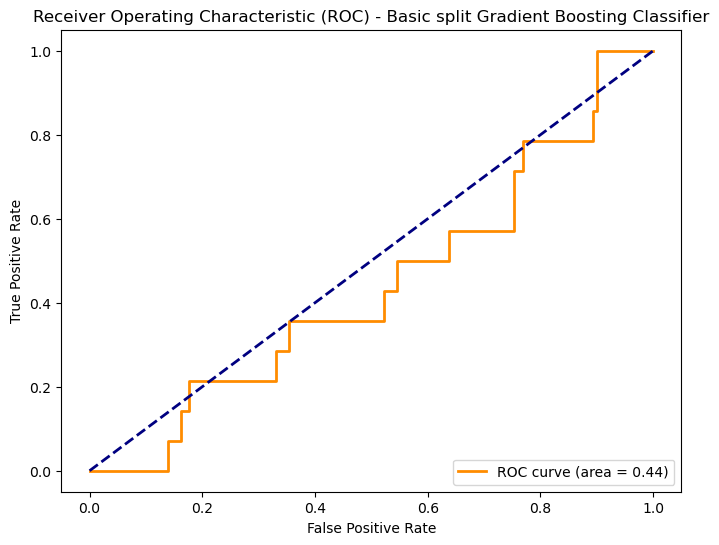

In [ ]:
# Create Gradient Boosting classifier object
gb_classifier_basic_split = GradientBoostingClassifier()

# Create a pipeline that standardizes, then runs Gradient Boosting
pipeline_gb_basic_split = make_pipeline(standardizer, gb_classifier_basic_split)

# Train model
pipeline_gb_basic_split.fit(features_train, target_train)

# Get accuracy score on the test set
gb_accuracy_basic_split = pipeline_gb_basic_split.score(features_test, target_test)
print("Basic split Train Test Split Gradient Boosting Classifier Accuracy:", gb_accuracy_basic_split)

# Calculate precision, recall, and F1-score
gb_prediction = pipeline_gb_basic_split.predict(features_test)
gb_precision = precision_score(target_test, gb_prediction, average='binary')
gb_recall = recall_score(target_test, gb_prediction, average='binary')
gb_f1 = f1_score(target_test, gb_prediction, average='binary')

print("Basic split Gradient Boosting Classifier Precision: {:.2f}".format(gb_precision))
print("Basic split Gradient Boosting Classifier Recall: {:.2f}".format(gb_recall))
print("Basic split Gradient Boosting Classifier F1-score: {:.2f}".format(gb_f1))

# Print classification report
print("\nBasic split Gradient Boosting Classifier Classification Report:")
print(classification_report(target_test, gb_prediction))

# Visualize confusion matrix
conf_matrix_gb_basic_split = confusion_matrix(target_test, gb_prediction)
sns.heatmap(conf_matrix_gb_basic_split, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix - Basic split Gradient Boosting Classifier')
plt.show()

# Visualize the ROC curve
fpr_gb_basic_split, tpr_gb_basic_split, _ = roc_curve(target_test, pipeline_gb_basic_split.predict_proba(features_test)[:, 1])
roc_auc_gb_basic_split = auc(fpr_gb_basic_split, tpr_gb_basic_split)

plt.figure(figsize=(8, 6))
plt.plot(fpr_gb_basic_split, tpr_gb_basic_split, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_gb_basic_split))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Basic split Gradient Boosting Classifier')
plt.legend(loc='lower right')
plt.show()

gb_bs_score = gb_accuracy_basic_split

### Gradient Boosting, Cross-Validation

Gradient Boosting Cross-Validation Accuracy: 0.9079854809437385
Gradient Boosting Cross-Validation Precision: 0.16666666666666666
Gradient Boosting Cross-Validation Recall: 0.02
Gradient Boosting Cross-Validation F1-score: 0.03508771929824562
Classification Report - Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       526
           1       0.17      0.02      0.04        50

    accuracy                           0.91       576
   macro avg       0.54      0.51      0.49       576
weighted avg       0.85      0.91      0.87       576



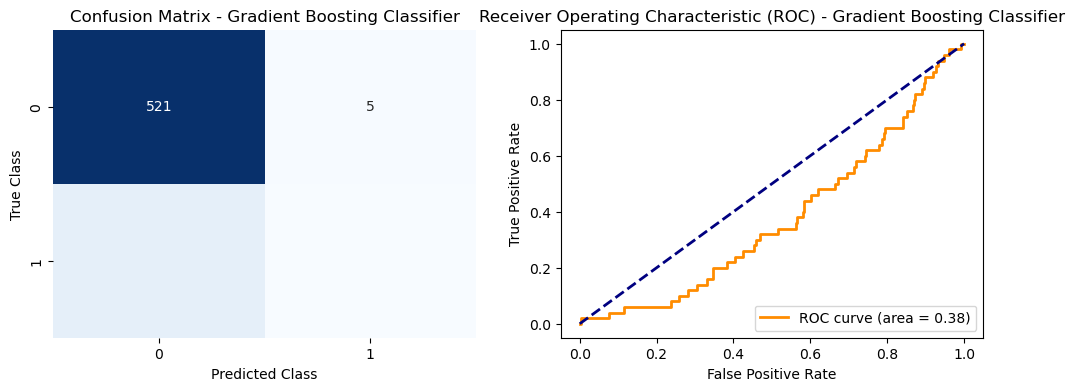

In [ ]:
# Create Gradient Boosting classifier object
gb_classifier_cv = GradientBoostingClassifier()

# Create a pipeline that standardizes, then runs Gradient Boosting
pipeline_gb_cv = make_pipeline(standardizer_cv, gb_classifier_cv)

# Conduct k-fold cross-validation
skf_gb_cv_results = cross_val_score(
    pipeline_gb_cv,  # Pipeline
    features,        # Feature matrix
    target,          # Target vector
    cv=skf,          # Cross-validation technique
    scoring="accuracy",  # Loss function
    n_jobs=-1        # Use all CPU cores
)

# Calculate aggregated statistics directly from cross_val_score results
gb_cv_accuracy = np.mean(skf_gb_cv_results)
gb_cv_precision = precision_score(target, cross_val_predict(pipeline_gb_cv, features, target, cv=skf), average='binary')
gb_cv_recall = recall_score(target, cross_val_predict(pipeline_gb_cv, features, target, cv=skf), average='binary')
gb_cv_f1 = f1_score(target, cross_val_predict(pipeline_gb_cv, features, target, cv=skf), average='binary')

# Confusion matrix and ROC based on cross_val_score results
cv_pred_gb_direct = cross_val_predict(pipeline_gb_cv, features, target, cv=skf, method='predict_proba')[:, 1]

# Threshold for binary classification
threshold_gb = 0.5
cv_pred_binary_gb = (cv_pred_gb_direct > threshold_gb).astype(int)

# Confusion matrix
cv_conf_matrix_gb_direct = confusion_matrix(target, cv_pred_binary_gb)

# ROC curve
fpr_gb_direct, tpr_gb_direct, _ = roc_curve(target, cv_pred_gb_direct)
roc_auc_gb_direct = auc(fpr_gb_direct, tpr_gb_direct)

# Classification report
cv_classification_report_gb = classification_report(target, cv_pred_binary_gb)

# Print aggregated statistics
print("Gradient Boosting Cross-Validation Accuracy:", gb_cv_accuracy)
print("Gradient Boosting Cross-Validation Precision:", gb_cv_precision)
print("Gradient Boosting Cross-Validation Recall:", gb_cv_recall)
print("Gradient Boosting Cross-Validation F1-score:", gb_cv_f1)

# Print classification report
print("Classification Report - Gradient Boosting Classifier:")
print(cv_classification_report_gb)

# Visualize confusion matrix
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.heatmap(cv_conf_matrix_gb_direct, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix - Gradient Boosting Classifier')

# Visualize the ROC curve
plt.subplot(1, 2, 2)
plt.plot(fpr_gb_direct, tpr_gb_direct, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_gb_direct))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Gradient Boosting Classifier')
plt.legend(loc='lower right')

plt.show()

gb_cv_score = gb_cv_accuracy

### Logistic Regression, Basic split

Basic split Train Test Split Logistic Regression Classifier Accuracy: 0.9027777777777778
Basic split Logistic Regression Classifier Precision: 0.00
Basic split Logistic Regression Classifier Recall: 0.00
Basic split Logistic Regression Classifier F1-score: 0.00

Basic split Logistic Regression Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       130
           1       0.00      0.00      0.00        14

    accuracy                           0.90       144
   macro avg       0.45      0.50      0.47       144
weighted avg       0.82      0.90      0.86       144



c:\Users\Nemanja\.conda\envs\mlenv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nemanja\.conda\envs\mlenv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nemanja\.conda\envs\mlenv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nemanja\.conda\envs\mlenv\Lib\site-pa

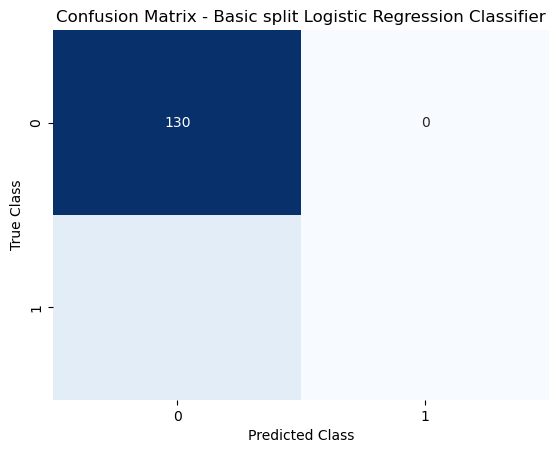

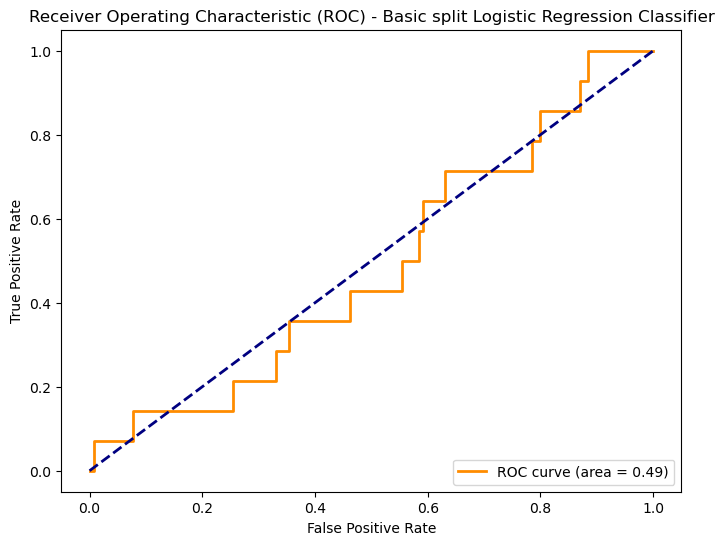

In [ ]:
# Create Logistic Regression classifier object
log_reg_classifier_basic_split = LogisticRegression()

# Create a pipeline that standardizes, then runs Logistic Regression
pipeline_log_reg_basic_split = make_pipeline(standardizer, log_reg_classifier_basic_split)

# Train model
pipeline_log_reg_basic_split.fit(features_train, target_train)

# Get accuracy score on the test set
log_reg_accuracy_basic_split = pipeline_log_reg_basic_split.score(features_test, target_test)
print("Basic split Train Test Split Logistic Regression Classifier Accuracy:", log_reg_accuracy_basic_split)

# Calculate precision, recall, and F1-score
lg_prediction = pipeline_log_reg_basic_split.predict(features_test)
lg_precision = precision_score(target_test, lg_prediction, average='binary')
lg_recall = recall_score(target_test, lg_prediction, average='binary')
lg_f1 = f1_score(target_test, lg_prediction, average='binary')

print("Basic split Logistic Regression Classifier Precision: {:.2f}".format(lg_precision))
print("Basic split Logistic Regression Classifier Recall: {:.2f}".format(lg_recall))
print("Basic split Logistic Regression Classifier F1-score: {:.2f}".format(lg_f1))

# Print classification report
print("\nBasic split Logistic Regression Classifier Classification Report:")
print(classification_report(target_test, lg_prediction))

# Visualize confusion matrix
conf_matrix_log_reg_basic_split = confusion_matrix(target_test, lg_prediction)
sns.heatmap(conf_matrix_log_reg_basic_split, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix - Basic split Logistic Regression Classifier')
plt.show()

# Visualize the ROC curve
fpr_log_reg_basic_split, tpr_log_reg_basic_split, _ = roc_curve(target_test, pipeline_log_reg_basic_split.predict_proba(features_test)[:, 1])
roc_auc_log_reg_basic_split = auc(fpr_log_reg_basic_split, tpr_log_reg_basic_split)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg_basic_split, tpr_log_reg_basic_split, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_log_reg_basic_split))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Basic split Logistic Regression Classifier')
plt.legend(loc='lower right')
plt.show()

lg_bs_score = log_reg_accuracy_basic_split

### Logistic Regression, Cross-Validation

Logistic Regression Cross-Validation Accuracy: 0.9097096188747731
Logistic Regression Cross-Validation Precision: 0.0
Logistic Regression Cross-Validation Recall: 0.0
Logistic Regression Cross-Validation F1-score: 0.0
Classification Report - Logistic Regression Classifier:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       526
           1       0.00      0.00      0.00        50

    accuracy                           0.91       576
   macro avg       0.46      0.50      0.48       576
weighted avg       0.83      0.91      0.87       576



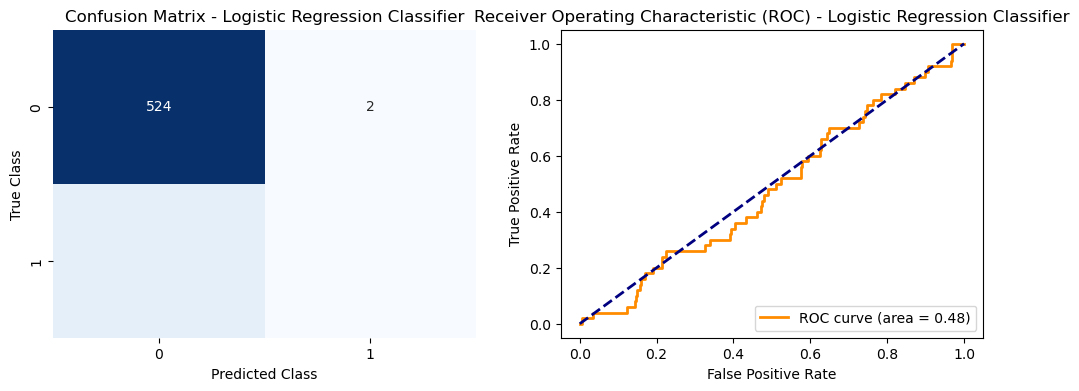

In [ ]:
# Create Logistic Regression classifier object
log_reg_classifier_cv = LogisticRegression()

# Create a pipeline that standardizes, then runs Logistic Regression
pipeline_log_reg_cv = make_pipeline(standardizer_cv, log_reg_classifier_cv)

# Conduct k-fold cross-validation
skf_log_reg_cv_results = cross_val_score(
    pipeline_log_reg_cv,  # Pipeline
    features,            # Feature matrix
    target,              # Target vector
    cv=skf,              # Cross-validation technique
    scoring="accuracy",  # Loss function
    n_jobs=-1            # Use all CPU cores
)

# Calculate aggregated statistics directly from cross_val_score results
lg_cv_accuracy = np.mean(skf_log_reg_cv_results)
lg_cv_precision = precision_score(target, cross_val_predict(pipeline_log_reg_cv, features, target, cv=skf), average='binary')
lg_cv_recall = recall_score(target, cross_val_predict(pipeline_log_reg_cv, features, target, cv=skf), average='binary')
lg_cv_f1 = f1_score(target, cross_val_predict(pipeline_log_reg_cv, features, target, cv=skf), average='binary')

# Confusion matrix and ROC based on cross_val_score results
cv_pred_log_reg_direct = cross_val_predict(pipeline_log_reg_cv, features, target, cv=skf, method='predict_proba')[:, 1]

# Threshold for binary classification
threshold_log_reg = 0.5
cv_pred_binary_log_reg = (cv_pred_log_reg_direct > threshold_log_reg).astype(int)

# Confusion matrix
cv_conf_matrix_log_reg_direct = confusion_matrix(target, cv_pred_binary_log_reg)

# ROC curve
fpr_log_reg_direct, tpr_log_reg_direct, _ = roc_curve(target, cv_pred_log_reg_direct)
roc_auc_log_reg_direct = auc(fpr_log_reg_direct, tpr_log_reg_direct)

# Classification report
cv_classification_report_log_reg = classification_report(target, cv_pred_binary_log_reg)

# Print aggregated statistics
print("Logistic Regression Cross-Validation Accuracy:", lg_cv_accuracy)
print("Logistic Regression Cross-Validation Precision:", lg_cv_precision)
print("Logistic Regression Cross-Validation Recall:", lg_cv_recall)
print("Logistic Regression Cross-Validation F1-score:", lg_cv_f1)

# Print classification report
print("Classification Report - Logistic Regression Classifier:")
print(cv_classification_report_log_reg)

# Visualize confusion matrix
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.heatmap(cv_conf_matrix_log_reg_direct, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix - Logistic Regression Classifier')

# Visualize the ROC curve
plt.subplot(1, 2, 2)
plt.plot(fpr_log_reg_direct, tpr_log_reg_direct, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_log_reg_direct))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Logistic Regression Classifier')
plt.legend(loc='lower right')

plt.show()
lg_cv_score = lg_cv_accuracy

## Results compared

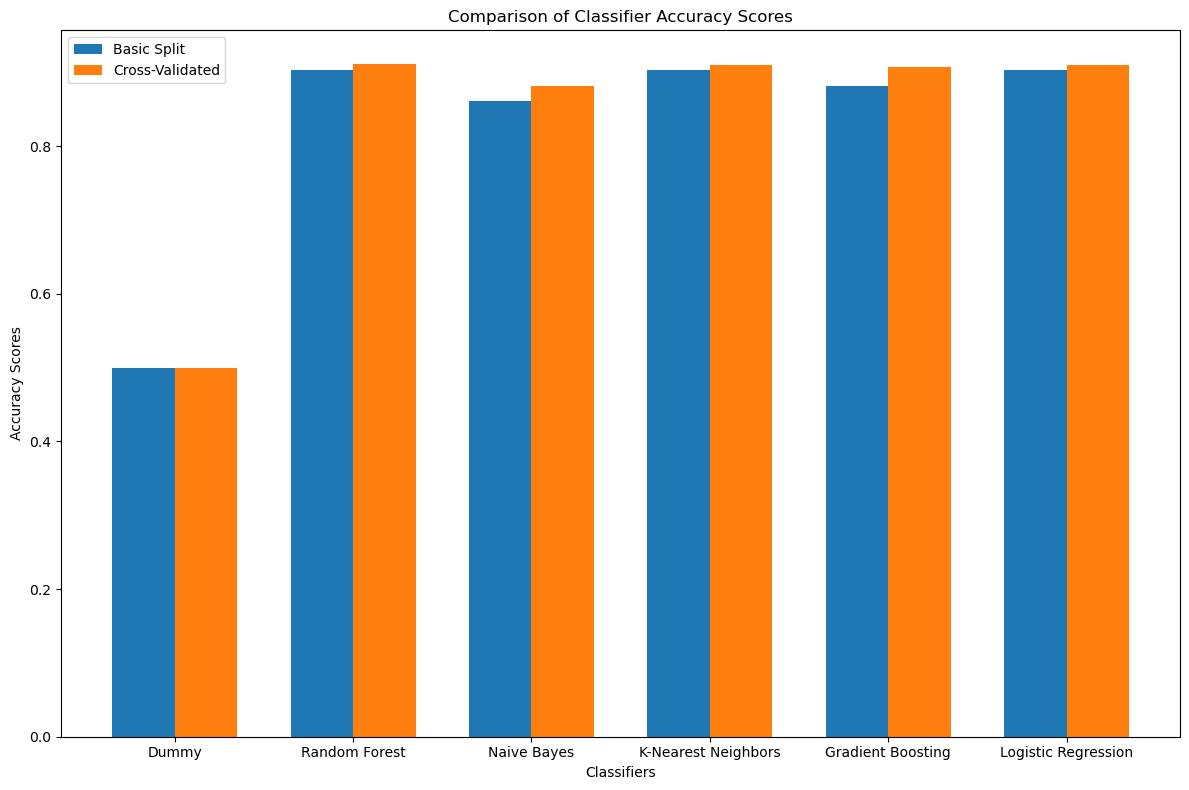

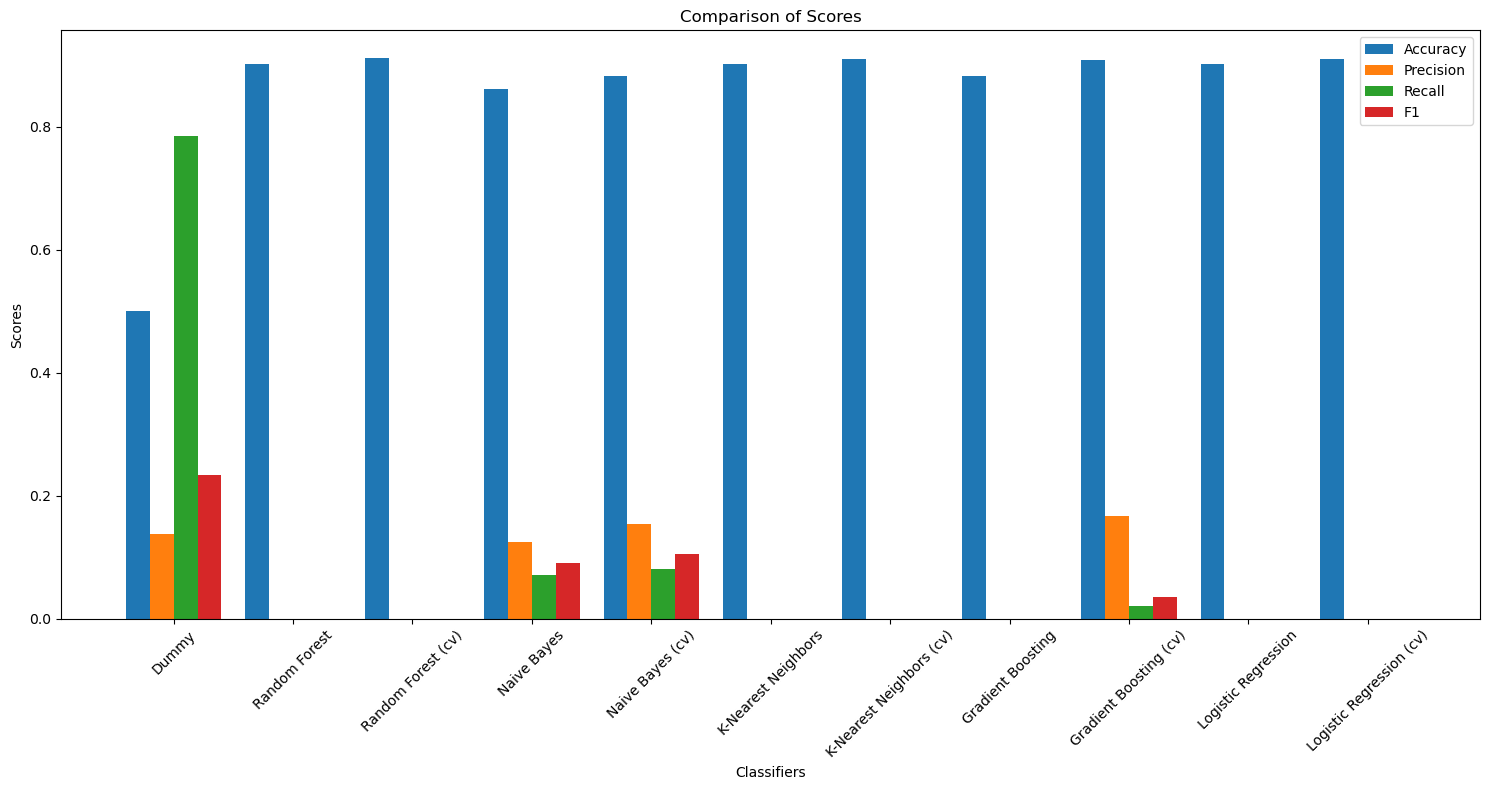

In [ ]:
# Define the classifiers
classifiers = ['Dummy', 'Random Forest', 'Naive Bayes', 'K-Nearest Neighbors', 'Gradient Boosting', 'Logistic Regression']

# Define the accuracy scores for basic split and cross-validated scenarios
accuracy_basic_split = [dummy_score, rf_bs_score, nb_bs_score, knn_bs_score, gb_bs_score, lg_bs_score]
accuracy_cross_val = [dummy_score, rfc_cv_accuracy, nb_cv_score, knn_cv_score, gb_cv_score, lg_cv_score]

# Plotting
bar_width = 0.35
index = np.arange(len(classifiers))

fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(index - bar_width/2, accuracy_basic_split, bar_width, label='Basic Split')
ax.bar(index + bar_width/2, accuracy_cross_val, bar_width, label='Cross-Validated')

ax.set_xlabel('Classifiers')
ax.set_ylabel('Accuracy Scores')
ax.set_title('Comparison of Classifier Accuracy Scores')
ax.set_xticks(index)
ax.set_xticklabels(classifiers)
ax.legend()

plt.tight_layout()
plt.show()



# Define the classifiers
classifiers = ['Dummy', 'Random Forest', 'Random Forest (cv)', 'Naive Bayes', 'Naive Bayes (cv)', 'K-Nearest Neighbors', 'K-Nearest Neighbors (cv)',
               'Gradient Boosting', 'Gradient Boosting (cv)', 'Logistic Regression', 'Logistic Regression (cv)']

# Define the accuracy scores for basic split and cross-validated scenarios
accuracy_basic_split = [dummy_score, rf_bs_score, rfc_cv_accuracy, nb_bs_score, nb_cv_score, knn_bs_score, knn_cv_score, gb_bs_score, gb_cv_score, lg_bs_score, lg_cv_score]
precision = [dummy_precision, rfc_precision, rfc_cv_precision, nb_precision, nb_cv_precision, knn_precision, knn_cv_precision, gb_precision, gb_cv_precision, lg_precision, lg_cv_precision]
recall = [dummy_recall, rfc_recall, rfc_cv_recall, nb_recall, nb_cv_recall, knn_recall, knn_cv_recall, gb_recall, gb_cv_recall, lg_recall, lg_cv_recall]
f1 = [dummy_f1, rfc_f1, rfc_cv_f1, nb_f1, nb_cv_f1, knn_f1, knn_cv_f1, gb_f1, gb_cv_f1, lg_f1, lg_cv_f1]

# Plotting
bar_width = 0.2
index = np.arange(len(classifiers))

fig, ax = plt.subplots(figsize=(15, 8))

ax.bar(index - 3*bar_width/2, accuracy_basic_split, bar_width, label='Accuracy')
ax.bar(index - bar_width/2, precision, bar_width, label='Precision')
ax.bar(index + bar_width/2, recall, bar_width, label='Recall')
ax.bar(index + 3*bar_width/2, f1, bar_width, label='F1')

ax.set_xlabel('Classifiers')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Scores')
ax.set_xticks(index)
ax.set_xticklabels(classifiers, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

## Hiperparameters tuning